In [6]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA, FactorAnalysis
from sklearn.feature_selection import VarianceThreshold
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

### Perform PCA
- form independent engineered features
- use PCA to score each company

In [35]:
scaler = StandardScaler()
# selector = VarianceThreshold(threshold=0.1)
data_all = pd.read_csv('../data/data.csv')
target = 'Bankrupt?'
data_X = data_all.drop(columns=[target])
data_X = data_X.iloc[:, [0,2,3,6,8,9,22,24,26,34,36,38,41,45,53,57,58,60]]
data_X = scaler.fit_transform(data_X)
data_y = data_all[target]

In [55]:
pca = PCA()
X_pca = pca.fit_transform(data_X)
exp_variance = pca.explained_variance_ratio_
cum_variance = np.cumsum(exp_variance)

In [ ]:
cum_variance

#### KMeans clustering

In [36]:
data_X = data_X
score = []
for i in range(2, 20):
    cluster = KMeans(n_clusters=i, random_state=42, n_init=10).fit(data_X)
    score.append(silhouette_score(data_X, cluster.labels_))

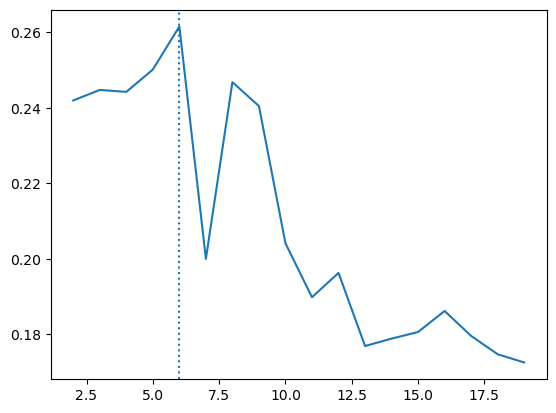

In [37]:
plt.plot(np.arange(2, 20), score)
plt.axvline(pd.DataFrame(score).idxmax()[0]+2,ls=':')

In [17]:
from sklearn.manifold import TSNE
tsne = TSNE()

In [38]:
cluster = KMeans(n_clusters=6, random_state=42).fit(data_X)
labels = cluster.labels_

In [39]:
np.bincount(labels)

array([4461, 2320,    1,    1,    3,   33], dtype=int64)

In [40]:
X_tsne = tsne.fit_transform(data_X)
x_min, x_max = X_tsne.min(axis=0), X_tsne.max(axis=0)
X_norm = (X_tsne - x_min) / (x_max - x_min) # equivalent to using MinMaxScaler

([], [])

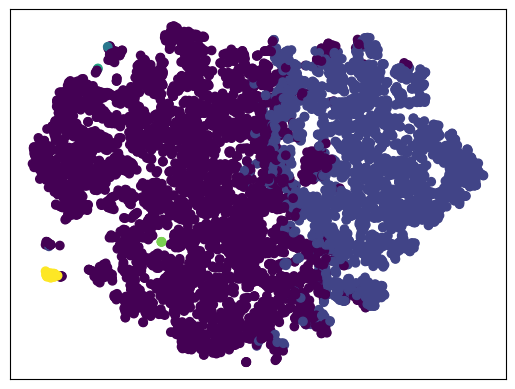

In [41]:
plt.scatter(X_norm[:, 0], X_norm[:, 1], c=labels)
plt.xticks([])
plt.yticks([])
# plt.savefig('2d_visualization_with_tsne.png', dpi=200)